In [4]:
# import numpy as np
import pandas as pd
import numpy as np

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

In [5]:
dataset = pd.read_table("C:/Users/Fabian/Desktop/TFs.tsv", index_col = 0)

In [6]:
AA_LIST = ['-', 'A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']
#Generate onehot encoded
n = len(AA_LIST)

def protein_onehot(alphabet, mask = None):
    #Create identity matrix according
    onehot_identity = np.eye(N = len(alphabet))
    if mask:
        idx = alphabet.index(mask)
        for i, elem in enumerate(onehot_identity[idx]):
            if elem == 1:
                onehot_identity[idx][i] = 0
    encode_lookup = {}
    for i, item in enumerate(alphabet):
        encode_lookup[item] = list(onehot_identity[i])
    
    return encode_lookup

table = protein_onehot(alphabet = AA_LIST, mask = "-")
def ohe_by_seq(seq, encoder = table):
    seq = seq.upper()
    encoded_seq = np.zeros(shape = (len(seq), len(encoder)))
    for i, item in enumerate(seq):
        if item in encoder.keys():
            encoded_seq[i] = encoder[item]
        else:
            encoded_seq[i] = encoder["-"] # replace with mask

    return encoded_seq.astype("int8")

def pad_seq(seq):
    mask = '-'
    max_len = 500
    pad_seqs = seq[:max_len] if len(seq) > max_len else seq + mask * (max_len - len(seq))

    return pad_seqs

In [7]:
features = dataset[["seqs", "marker"]]
features["seqs"] = features["seqs"].apply(pad_seq)

C:\Users\Fabian\AppData\Local\Temp\ipykernel_1104\2415196673.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features["seqs"] = features["seqs"].apply(pad_seq)


In [8]:
n = 15
percent = features.head(int(len(features)*(n/100)))
encoded_seqs = percent["seqs"].apply(ohe_by_seq)

In [9]:
percent["enc"] = encoded_seqs

C:\Users\Fabian\AppData\Local\Temp\ipykernel_1104\3748945313.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  percent["enc"] = encoded_seqs


In [10]:
percent[percent["marker"] == "TF"]

,seqs,marker,enc
0,MAFSAEDVLKEYDRRRRMEALLLSLYYPNDRKLLDYKEWSPPRVQV...,TF,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,..."
117,MSFQRDYESEWNAALIEEYGEGGSGFSHGRFASLRMCEQRLYRPPG...,TF,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,..."
3419,MERLKRMSVFAKVVEFGSFTAAARQLQMSVSSISQTVSKLEDELQV...,TF,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,..."
3420,MERLKRMSVFAKVVEFGSFTAAARQLQMSVSSISQTVSKLEDELQV...,TF,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,..."
3421,MERLKRMSVFAKVVEFGSFTAAARQLQMSVSSISQTVSKLEDELQV...,TF,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,..."
...,...,...,...
84453,MNISDVAKITGLTSKAIRFYEEKGLVTPPMRSENGYRTYTQQHLNE...,TF,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,..."
84454,MNISQIAKLTSLTAKSIRLYEEKGLIIPPLRSESGYRTYTQQHVDD...,TF,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,..."
84455,MNISQIAKLTSLTAKSIRLYEEKGLIIPPLRSESGYRTYTQQHVDD...,TF,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,..."
84456,MNISDVAKKTGLTSKAIRFYEEKKLVTPPVRTDNGYRSYTAKHIEE...,TF,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,..."


In [11]:
TFs = features[features["marker"] == "TF"]
TFs
NonTFs = features[features["marker"] == "NoTF"]
NonTFs

,seqs,marker
1,MSIIGATRLQNDKSDTYSAGPCYAGGCSAFTPRGTCGKDWDLGEQT...,NoTF
2,MASNTVSAQGGSNRPVRDFSNIQDVAQFLLFDPIWNEQPGSIVPWK...,NoTF
3,MYQAINPCPQSWYGSPQLEREIVCKMSGAPHYPNYYPVHPNALGGA...,NoTF
4,MARPLLGKTSSVRRRLESLSACSIFFFLRKFCQKMASLVFLNSPVY...,NoTF
5,MNAKYDTDQGVGRMLFLGTIGLAVVVGGLMAYGYYYDGKTPSSGTS...,NoTF
...,...,...
571604,MGNSKSKSKLSANQYEQQTVNSTKQVAILKRQAEPSLYGRHNCRCC...,NoTF
571605,MSSSLEITSFYSFIWTPHIGPLLFGIGLWFSMFKEPSHFCPCQHPH...,NoTF
571606,MGNCNRTQKPSSSSNNLEKPPQAAEFRRTAEPSLYGRYNCKCCWFA...,NoTF
571607,MGLRYSKEVRDRHGDKDPEGRIPITQTMPQTLYGRYNCKSCWFANK...,NoTF


In [12]:
balanced = NonTFs.iloc[:len(TFs)]
balanced

,seqs,marker
1,MSIIGATRLQNDKSDTYSAGPCYAGGCSAFTPRGTCGKDWDLGEQT...,NoTF
2,MASNTVSAQGGSNRPVRDFSNIQDVAQFLLFDPIWNEQPGSIVPWK...,NoTF
3,MYQAINPCPQSWYGSPQLEREIVCKMSGAPHYPNYYPVHPNALGGA...,NoTF
4,MARPLLGKTSSVRRRLESLSACSIFFFLRKFCQKMASLVFLNSPVY...,NoTF
5,MNAKYDTDQGVGRMLFLGTIGLAVVVGGLMAYGYYYDGKTPSSGTS...,NoTF
...,...,...
6663,MHPKRRLCWCLPASGAWAFMLTSLIADTTACESEERLFHKLFSRYN...,NoTF
6664,MLTSKGQGFLHGGLCLWLCVFTPFFKGCVGCATEERLFHKLFSHYN...,NoTF
6665,MLNSRDQGNLHSGLCLWLCGFLALFKGSTGCESEEQLFHRLFAHYN...,NoTF
6666,MLTSKGQGFLHGGLCLWLCVFTPFFKGCVGCATEERLFHKLFSHYN...,NoTF


In [14]:
combined_balanced = pd.concat([TFs, balanced]).reset_index()
combined_balanced.to_csv("C:/Users/Fabian/Desktop/TFs_balanced.tsv", sep = "\t")

In [23]:
enc = combined_balanced["seqs"].apply(ohe_by_seq)

In [27]:
combined_balanced["enc"] = enc
feats = combined_balanced[["enc", "marker"]]
feats

,enc,marker
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,...",TF
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,...",TF
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,...",TF
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,...",TF
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,...",TF
...,...,...
13285,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,...",NoTF
13286,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,...",NoTF
13287,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,...",NoTF
13288,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,...",NoTF


In [28]:
X_train, X_test, y_train, y_test = train_test_split(feats["enc"], feats["marker"], train_size = 0.8)

In [29]:
new_train = []
for arr in X_train:
    new_train.append(arr.flatten())
X_train = np.asarray(new_train)

In [30]:
X_train.shape

(10632, 10500)

In [31]:
new_test = []
for arr in X_test:
    new_test.append(arr.flatten())
X_test = np.asarray(new_test)
X_test.shape

(2658, 10500)

In [33]:
cf = MLPClassifier(random_state = 1, max_iter = 300, verbose = True, warm_start = True).fit(X_train, y_train)

Iteration 1, loss = 0.34613252
Iteration 2, loss = 0.10057861
Iteration 3, loss = 0.04527267
Iteration 4, loss = 0.02350021
Iteration 5, loss = 0.01289336
Iteration 6, loss = 0.00809065
Iteration 7, loss = 0.00561086
Iteration 8, loss = 0.00414022
Iteration 9, loss = 0.00322743
Iteration 10, loss = 0.00258566
Iteration 11, loss = 0.00213254
Iteration 12, loss = 0.00179572
Iteration 13, loss = 0.00153583
Iteration 14, loss = 0.00133300
Iteration 15, loss = 0.00117331
Iteration 16, loss = 0.00104083
Iteration 17, loss = 0.00093111
Iteration 18, loss = 0.00084386
Iteration 19, loss = 0.00076641
Iteration 20, loss = 0.00070415
Iteration 21, loss = 0.00064984
Iteration 22, loss = 0.00060118
Iteration 23, loss = 0.00056097
Iteration 24, loss = 0.00052533
Iteration 25, loss = 0.00049385
Iteration 26, loss = 0.00046610
Iteration 27, loss = 0.00044071
Iteration 28, loss = 0.00041853
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


In [34]:
from sklearn.metrics import PrecisionRecallDisplay, confusion_matrix

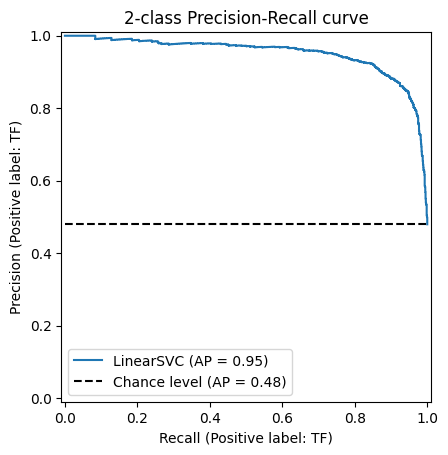

In [35]:
display = PrecisionRecallDisplay.from_estimator(
    cf, X_test, y_test, name="MLPClassifier", plot_chance_level=True
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

In [36]:
"""
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,

                              display_labels=clf.classes_)
"""
from sklearn.metrics import ConfusionMatrixDisplay

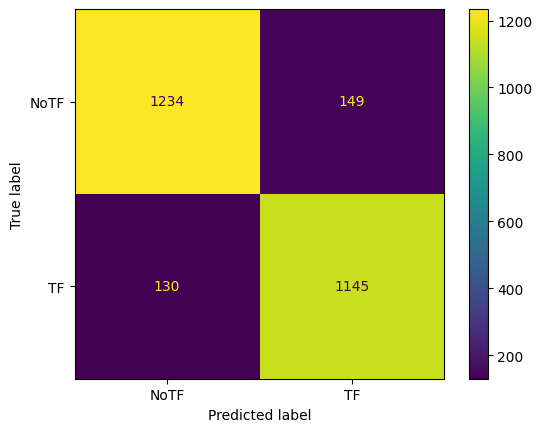

In [37]:
ConfusionMatrixDisplay.from_estimator(
    cf, X_test, y_test)

In [43]:
# As this notebook is cleaner, try RF with balanced dataset
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [39]:
rf = RandomForestClassifier(verbose = 3).fit(X_train, y_train)

building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100


[Parallel(n_jobs=1)]: Done  31 tasks      | elapsed:   12.8s


building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73

[Parallel(n_jobs=1)]: Done  31 tasks      | elapsed:    0.0s


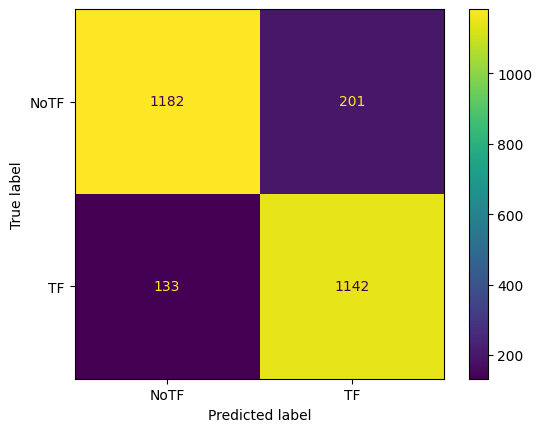

In [40]:
ConfusionMatrixDisplay.from_estimator(
    rf, X_test, y_test)

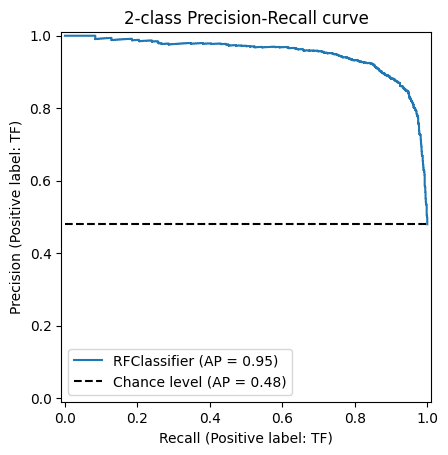

In [41]:
display = PrecisionRecallDisplay.from_estimator(
    cf, X_test, y_test, name="RFClassifier", plot_chance_level=True
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

In [46]:
gbd = GradientBoostingClassifier(verbose = 1).fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           1.3683           13.45m
         2           1.3527           14.51m
         3           1.3380           13.79m
         4           1.3261           13.34m
         5           1.3125           13.00m
         6           1.3007           12.72m
         7           1.2903           12.49m
         8           1.2808           12.66m
         9           1.2676           13.01m
        10           1.2575           12.83m
        20           1.1780           11.09m
        30           1.1126            9.47m
        40           1.0616            8.09m
        50           1.0194            6.73m
        60           0.9817            5.37m
        70           0.9470            4.03m
        80           0.9164            2.68m
        90           0.8884            1.34m
       100           0.8631            0.00s


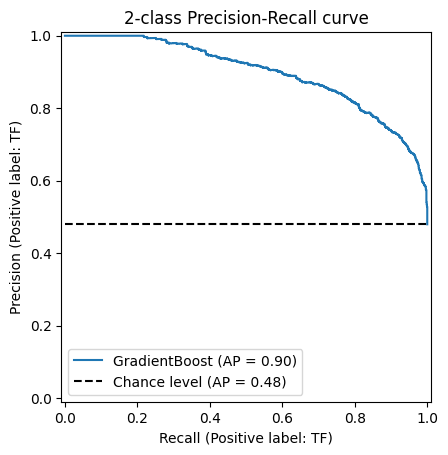

In [48]:
display = PrecisionRecallDisplay.from_estimator(
    gbd, X_test, y_test, name="GradientBoost", plot_chance_level=True
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

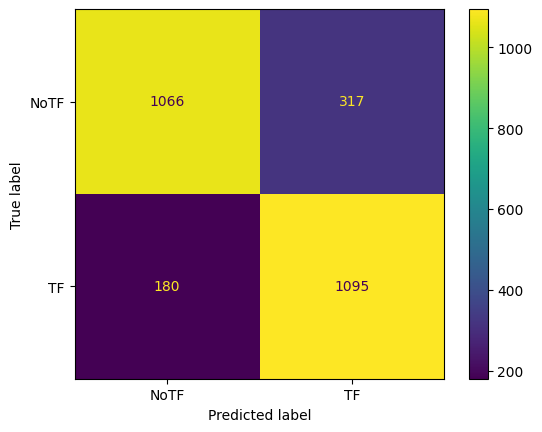

In [49]:
ConfusionMatrixDisplay.from_estimator(
    gbd, X_test, y_test)

In [50]:
import torch
import torch.nn as nn

In [58]:
class CNN_model(nn.Module):

    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 20, 5)

    def foward(self):
        pass

In [59]:
CNN_ = CNN_model()

In [60]:
# I WROTE MY OWN ONE HOT ENCODING BUT TANGERMEME PROVIDES FASTER ALTERNATIVE ESPECIALLY FOR PYTORCH TENSORS!

In [69]:
# Create some linear relationship (y =mx+b)
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1) # create a 2d tensor (50,) => (50,1)
y = weight * X + bias

In [68]:
X.shape

torch.Size([50])

In [70]:
train_split = int(0.8 * len(X))

In [71]:
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [74]:
from matplotlib import pyplot as plt

def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

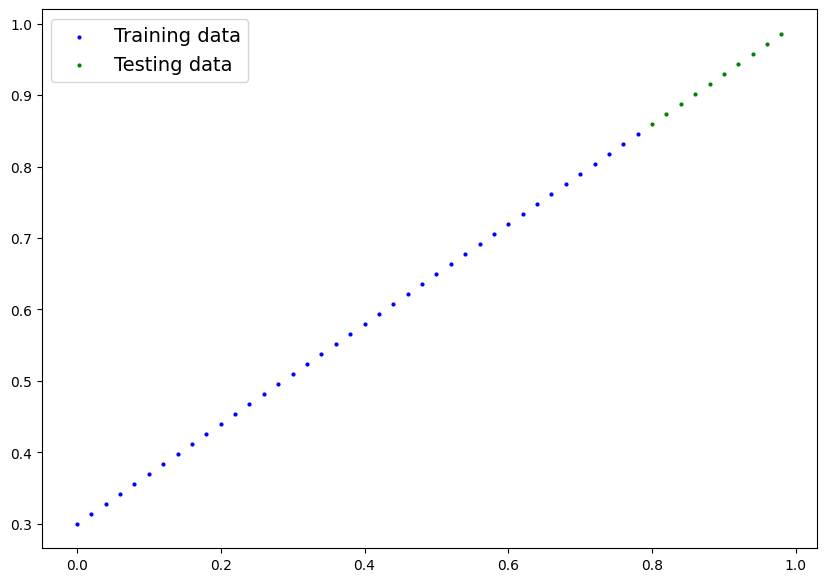

In [75]:
plot_predictions()

In [89]:
# Create a Linear Regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch is a nn.Module (think of this as neural network lego blocks)
    def __init__(self):
        super().__init__() 
        self.weights = nn.Parameter(torch.randn(1, # <- start with random weights (this will get adjusted as the model learns)
                                                dtype=torch.float), # <- PyTorch loves float32 by default
                                   requires_grad=True) # <- can we update this value with gradient descent?)

        self.bias = nn.Parameter(torch.randn(1, # <- start with random bias (this will get adjusted as the model learns)
                                            dtype=torch.float), # <- PyTorch loves float32 by default
                                requires_grad=True) # <- can we update this value with gradient descent?))

    # Forward defines the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data (e.g. training/testing features)
        return self.weights * x + self.bias # <- this is the linear regression formula (y = m*x + b)

In [90]:
torch.manual_seed(42)

model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [84]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [91]:
# Make predictions with model
with torch.inference_mode(): 
    y_preds = model_0(X_test)

# Note: in older PyTorch code you might also see torch.no_grad()
# with torch.no_grad():
#   y_preds = model_0(X_test)

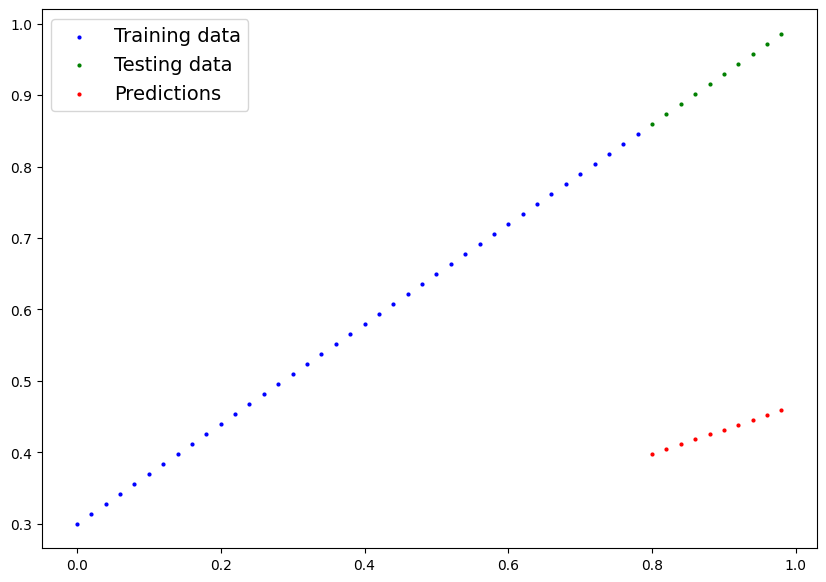

In [92]:
plot_predictions(predictions = y_preds)

In [93]:
# Create loss function
loss_fn = nn.L1Loss()

# Create optimizer
optimizer = torch.optim.SGD(params= model_0.parameters(), lr = 0.01)

In [94]:
torch.manual_seed(42)

epochs = 100

train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):

    # Put model in training mode (this is default)
    model_0.train()
    # 1. Forward pass on train data using the
    y_pred = model_0(X_train)
    # 2. Calculcate the loss
    loss = loss_fn(y_pred, y_train)
    # 3. Zero grad of the optimizer
    optimizer.zero_grad()
    # 4. loss backwards
    loss.backward
    # 5. Progress the optimizer
    optimizer.step()

    ### Testing
    # model in eval mode
    model_0.eval()
    with torch.inference_mode():
        test_pred = model_0(X_test)

        # 2. Calculate loss on test data_list
        test_loss = loss_fn(test_pred, y_test.type(torch.float))
        if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train loss: {loss} | MAE Test loss: {test_loss}")
        

Epoch: 0 | MAE Train loss: 0.31288138031959534 | MAE Test loss: 0.4945361614227295
Epoch: 10 | MAE Train loss: 0.31288138031959534 | MAE Test loss: 0.4945361614227295
Epoch: 20 | MAE Train loss: 0.31288138031959534 | MAE Test loss: 0.4945361614227295
Epoch: 30 | MAE Train loss: 0.31288138031959534 | MAE Test loss: 0.4945361614227295
Epoch: 40 | MAE Train loss: 0.31288138031959534 | MAE Test loss: 0.4945361614227295
Epoch: 50 | MAE Train loss: 0.31288138031959534 | MAE Test loss: 0.4945361614227295
Epoch: 60 | MAE Train loss: 0.31288138031959534 | MAE Test loss: 0.4945361614227295
Epoch: 70 | MAE Train loss: 0.31288138031959534 | MAE Test loss: 0.4945361614227295
Epoch: 80 | MAE Train loss: 0.31288138031959534 | MAE Test loss: 0.4945361614227295
Epoch: 90 | MAE Train loss: 0.31288138031959534 | MAE Test loss: 0.4945361614227295


In [95]:
torch.manual_seed(42)

# Set the number of epochs (how many times the model will pass over the training data)
epochs = 100

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ### Training

    # Put model in training mode (this is the default state of a model)
    model_0.train()

    # 1. Forward pass on train data using the forward() method inside 
    y_pred = model_0(X_train)
    # print(y_pred)

    # 2. Calculate the loss (how different are our models predictions to the ground truth)
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad of the optimizer
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Progress the optimizer
    optimizer.step()

    ### Testing

    # Put the model in evaluation mode
    model_0.eval()

    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model_0(X_test)

      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, y_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

      # Print out what's happening
      if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 0.31288138031959534 | MAE Test Loss: 0.48106518387794495 
Epoch: 10 | MAE Train Loss: 0.1976713240146637 | MAE Test Loss: 0.3463551998138428 
Epoch: 20 | MAE Train Loss: 0.08908725529909134 | MAE Test Loss: 0.21729660034179688 
Epoch: 30 | MAE Train Loss: 0.053148526698350906 | MAE Test Loss: 0.14464017748832703 
Epoch: 40 | MAE Train Loss: 0.04543796554207802 | MAE Test Loss: 0.11360953003168106 
Epoch: 50 | MAE Train Loss: 0.04167863354086876 | MAE Test Loss: 0.09919948130846024 
Epoch: 60 | MAE Train Loss: 0.03818932920694351 | MAE Test Loss: 0.08886633068323135 
Epoch: 70 | MAE Train Loss: 0.03476089984178543 | MAE Test Loss: 0.0805937647819519 
Epoch: 80 | MAE Train Loss: 0.03132382780313492 | MAE Test Loss: 0.07232122868299484 
Epoch: 90 | MAE Train Loss: 0.02788739837706089 | MAE Test Loss: 0.06473556160926819 


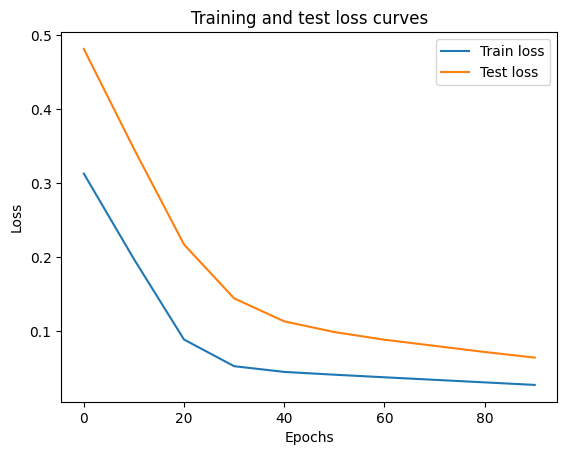

In [96]:
plt.plot(epoch_count, train_loss_values, label = "Train loss")
plt.plot(epoch_count, test_loss_values, label = "Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [97]:
# 1. Set the model in evaluation mode
model_0.eval()

# 2. Setup the inference mode context manager
with torch.inference_mode():
  # 3. Make sure the calculations are done with the model and data on the same device
  # in our case, we haven't setup device-agnostic code yet so our data and model are
  # on the CPU by default.
  # model_0.to(device)
  # X_test = X_test.to(device)
  y_preds = model_0(X_test)
y_preds

tensor([[0.8141],
        [0.8256],
        [0.8372],
        [0.8488],
        [0.8603],
        [0.8719],
        [0.8835],
        [0.8950],
        [0.9066],
        [0.9182]])

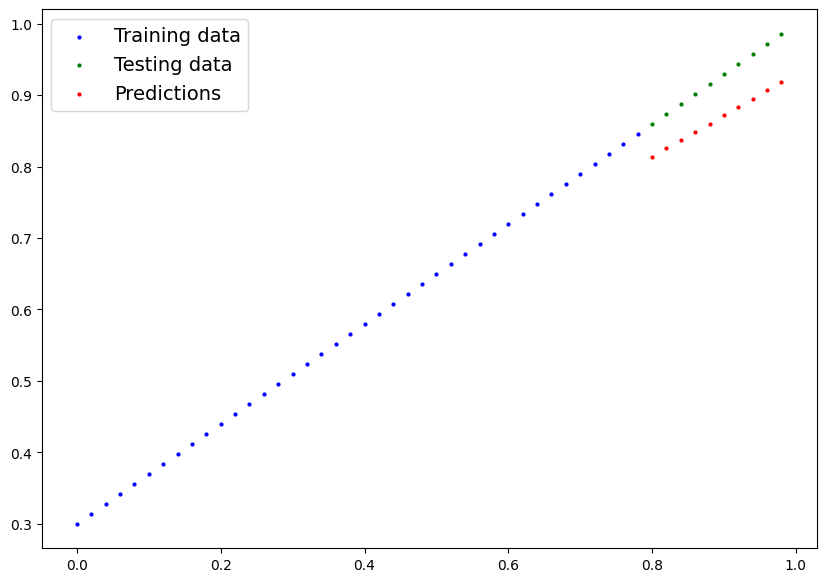

In [98]:
plot_predictions(predictions=y_preds)

In [99]:
from pathlib import Path

# 1. Create models directory 
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path 
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict 
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models\01_pytorch_workflow_model_0.pth


In [100]:
# Instantiate a new instance of our model (this will be instantiated with random weights)
loaded_model_0 = LinearRegressionModel()

# Load the state_dict of our saved model (this will update the new instance of our model with trained weights)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [101]:
# Now with nn layer
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cpu


In [102]:


# Create weight and bias
weight = 0.7
bias = 0.3

# Create range values
start = 0
end = 1
step = 0.02

# Create X and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1) # without unsqueeze, errors will happen later on (shapes within linear layers)
y = weight * X + bias 
X[:10], y[:10]


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [103]:


# Split data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)


(40, 40, 10, 10)

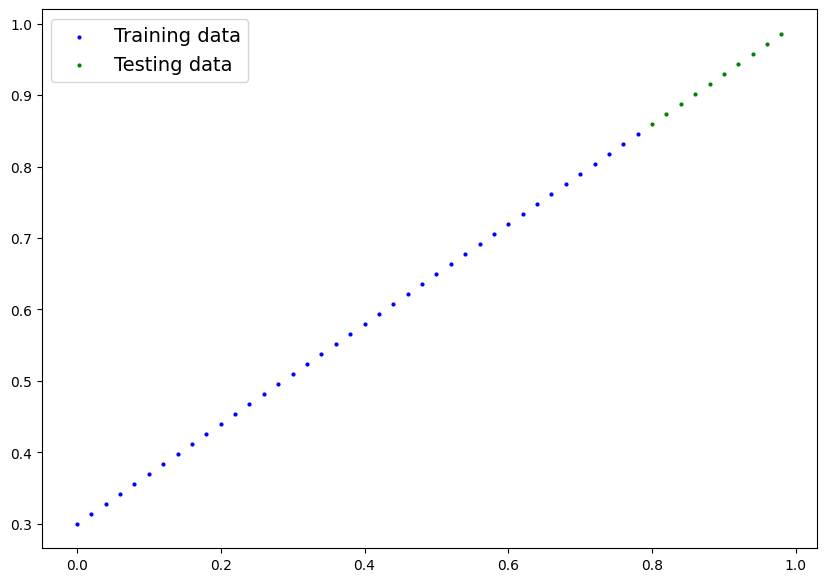

In [104]:
plot_predictions()

In [111]:
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        # Use nn.linear() for creating the model parameters
        self.linear_layer = nn.Linear(in_features = 1, out_features = 1)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [112]:
# Set model to GPU if it's availalble, otherwise it'll default to CPU
model_1.to(device) # the device variable was set above to be "cuda" if available or "cpu" if not
next(model_1.parameters()).device

device(type='cpu')

In [113]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params = model_1.parameters(), lr = 0.01)

In [109]:
torch.manual_seed(42)

epochs = 1000

X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    model_1.train()
    y_pred = model_1(X_train)
    loss = loss_fn(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    model_1.eval()
    with torch.inference_model():
        test_pred = model_1(X_test)
        test_loss = loss_fn(test_pred, y_test)
    if epoch % 100 == 0:
        print(f"{epoch} | Train loss: {loss} | Test loss: {test_loss}"
        

SyntaxError: incomplete input (183498433.py, line 23)

In [114]:
torch.manual_seed(42)

# Set the number of epochs 
epochs = 1000 

# Put data on the available device
# Without this, error will happen (not all model/data on device)
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    ### Training
    model_1.train() # train mode is on by default after construction

    # 1. Forward pass
    y_pred = model_1(X_train)

    # 2. Calculate loss
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad optimizer
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Step the optimizer
    optimizer.step()

    ### Testing
    model_1.eval() # put the model in evaluation mode for testing (inference)
    # 1. Forward pass
    with torch.inference_mode():
        test_pred = model_1(X_test)
    
        # 2. Calculate the loss
        test_loss = loss_fn(test_pred, y_test)

    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Train loss: 0.5551779866218567 | Test loss: 0.5739762187004089
Epoch: 100 | Train loss: 0.006215679459273815 | Test loss: 0.014086711220443249
Epoch: 200 | Train loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 300 | Train loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 400 | Train loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 500 | Train loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 600 | Train loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 700 | Train loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 800 | Train loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 900 | Train loss: 0.0012645035749301314 | Test loss: 0.013801807537674904


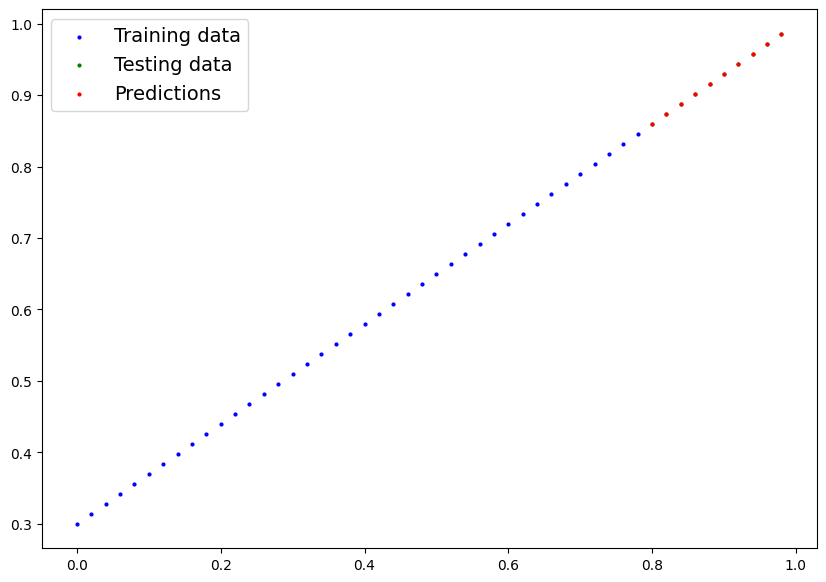

In [116]:
model_1.eval()

with torch.inference_mode():
    y_preds = model_1(X_test)
y_preds

plot_predictions(predictions = y_preds)